In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import wf_psf as wf



In [4]:

args = {
    'id_name': '_wf_PR_12_cycles_02nm_v1_' ,
    'suffix_id_name': '_' ,
    'base_id_name': '_wf_PR_12_cycles_02nm_v1' ,
    'eval_only_param': False ,
    'total_cycles': 12 ,
    'saved_cycle': 'cycle12' ,
    'reset_dd_features': True ,
    'eval_only_param': False ,
    'project_dd_features': True ,
    'd_max': 2 ,
    'n_zernikes': 66 ,
    'save_all_cycles': True ,
    'n_bins_lda': 20,
    'n_bins_gt': 20,
    'output_dim': 32,
    'batch_size': 32,
    'oversampling_rate': 3.,
    'output_q': 3.,
    'sed_sigma': 0.,
    'x_lims': [0, 1e3],
    'y_lims': [0, 1e3],
    'sed_interp_kind': 'linear',
    'interp_pts_per_bin': 0,
    'extrapolate': True,
    'opt_stars_rel_pix_rmse': True ,
    'eval_mono_metric_rmse': False,
    'eval_opd_metric_rmse': True,
    'eval_train_shape_sr_metric_rmse': True,
    'pupil_diameter': 256 ,
    'n_epochs_param_multi_cycle': "0" ,
    'n_epochs_non_param_multi_cycle': "75" ,
    'l_rate_non_param_multi_cycle': "0.1" ,
    'l_rate_param_multi_cycle': "0" ,
    'l_rate_param': None,
    'l_rate_non_param': None,
    'n_epochs_param': None,
    'n_epochs_non_param': None,
    'model': 'poly_physical' ,
    'model_eval': 'physical' ,
    'cycle_def': 'complete' ,
    'gt_n_zernikes': 66 ,
    'd_max_nonparam': 5 ,
    'saved_model_type': 'external' ,
    'use_sample_weights': True ,
    'l2_param': 0. ,
    'interpolation_type': 'none' ,
    'eval_batch_size': 16 ,
    'train_opt': True ,
    'eval_opt': True ,
    'plot_opt': True ,
    'dataset_folder': '/disk/xray0/tl3/datasets/wf-phase-retrieval/euclid_data_sims/data/',
    'test_dataset_file': 'test_SFE_02nm_id_11.npy',
    'train_dataset_file': 'train_SFE_err_02nm_id_11.npy',
    'base_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval-euclid-exp/wf-outputs/',
    'metric_base_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval-euclid-exp/wf-outputs/metrics/',
    'chkp_save_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval-euclid-exp/wf-outputs/chkp/',
    'plots_folder': 'plots/' ,
    'model_folder': 'chkp/' ,
    'log_folder': 'log-files/' ,
    'optim_hist_folder': 'optim-hist/' ,
    'star_numbers': 1 ,
}



In [5]:
base_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval-euclid-exp/wf-outputs/'
log_folder = 'log-files/'
metric_base_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval-euclid-exp/wf-outputs/metrics/'
base_chkp_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval-euclid-exp/wf-outputs/chkp/chkp_callback_poly_physical_wf_PR_12_cycles_02nm_v1__'


# base_id_name = '_wf_PR_12_cycles_v1_'
# eval_cycle = 'cycle1'

args['base_path'] = base_path
args['log_folder'] = log_folder
args['metric_base_path'] = metric_base_path




In [8]:
base_id_name_list = [
    '_wf_PR_12_cycles_02nm_v1',
    '_wf_PR_12_cycles_10nm_v1',
]

eval_cycle_base_id_list = [12,12]#,12,18,18,16,12,14]
metrics = []
it = 0
# Iterate over the base_ids
for base_id, total_cycles in zip(base_id_name_list, eval_cycle_base_id_list):
    # Define the list of cycles
    eval_cycle_list = np.arange(1,total_cycles+1)
    metrics.append([])
    # Iterate over the cycles
    for eval_cycle in eval_cycle_list:
        loaded_metrics = np.load(
            args['metric_base_path'] + 'metrics-poly_physical' + base_id + 'cycle' + str(eval_cycle) + '.npy' ,
            allow_pickle=True
        )[()]
        metrics[it].append(loaded_metrics)

    it += 1


In [9]:

metrics[0][0]['test_metrics'].keys()


dict_keys(['poly_metric', 'mono_metric', 'opd_metric', 'shape_results_dict'])

In [10]:
def define_plot_style():
    # Define plot paramters
    plot_style = {
        'figure.figsize': (12, 8),
        'figure.dpi': 200,
        'figure.autolayout': True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 16
    }
    mpl.rcParams.update(plot_style)
    # Use seaborn style
    sns.set()

define_plot_style()

In [11]:


metrics[0][0]['test_metrics'].keys()

metrics[0][0]['test_metrics']['shape_results_dict'].keys()

dict_keys(['pred_e1_HSM', 'pred_e2_HSM', 'pred_R2_HSM', 'GT_pred_e1_HSM', 'GT_ped_e2_HSM', 'GT_pred_R2_HSM', 'rmse_e1', 'std_rmse_e1', 'rel_rmse_e1', 'std_rel_rmse_e1', 'rmse_e2', 'std_rmse_e2', 'rel_rmse_e2', 'std_rel_rmse_e2', 'rmse_R2_meanR2', 'std_rmse_R2_meanR2', 'pix_rmse', 'pix_rmse_std', 'rel_pix_rmse', 'rel_pix_rmse_std', 'output_Q', 'output_dim', 'n_bins_lda', 'stars_rel_pix_rmse'])

In [12]:
# Extract results

# Extract OPD results
test_opd_rel_results = []
train_opd_rel_results = []
# Extract pix resutls
test_pix_rel_results = []
train_pix_rel_results = []
# Extract SR pix resutls
test_SR_pix_rel_results = []
train_SR_pix_rel_results = []

for it_1 in range(len(metrics)):
    test_opd_rel_results.append([])
    train_opd_rel_results.append([])

    test_pix_rel_results.append([])
    train_pix_rel_results.append([])

    test_SR_pix_rel_results.append([])
    train_SR_pix_rel_results.append([])

    for it_2 in range(len(metrics[it_1])):

        test_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['opd_metric']['rel_rmse_opd']
        )
        train_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['opd_metric']['rel_rmse_opd']
        )
        
        test_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['poly_metric']['rel_rmse']
        )
        train_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['poly_metric']['rel_rmse']
        )

        test_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['shape_results_dict']['rel_pix_rmse']
        )
        train_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['shape_results_dict']['rel_pix_rmse']
        )



In [13]:
labels = [
    '02nm 12_cycles',
    '10nm 12_cycles',
]


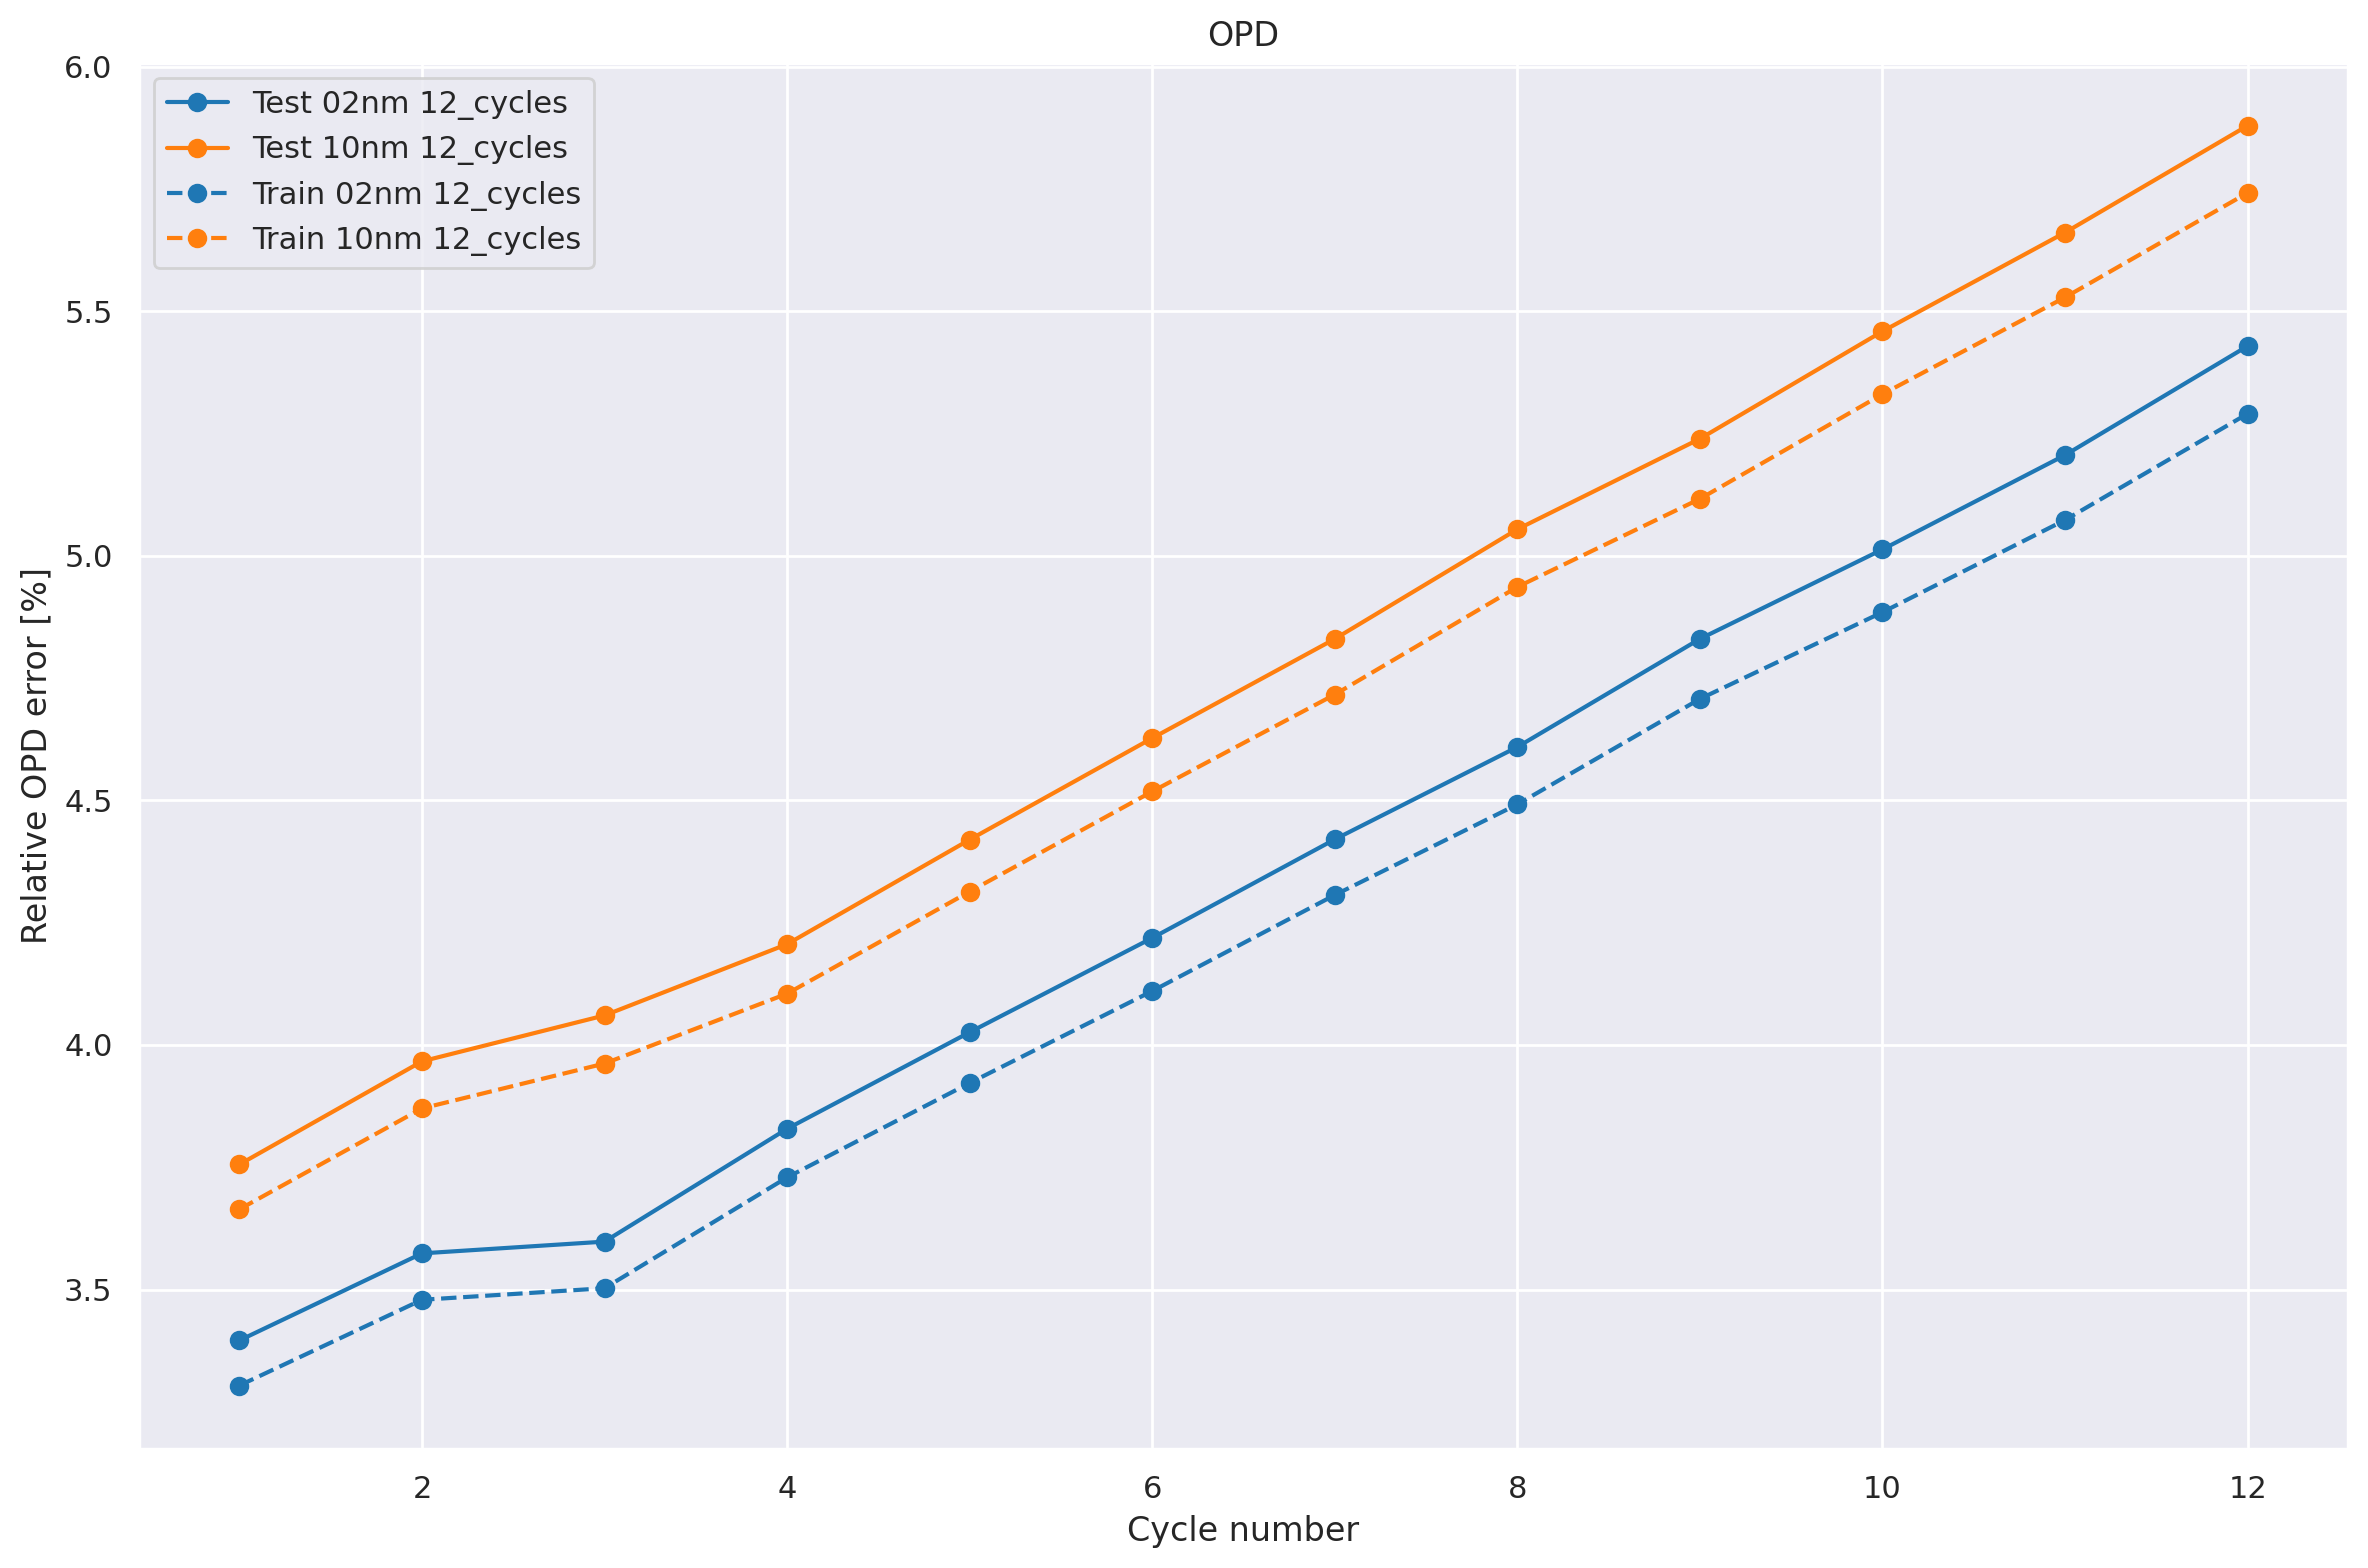

In [14]:
# OPD
cmap = plt.get_cmap('tab10')

plt.figure()

for it, res in enumerate(test_opd_rel_results):
    plt.plot(np.arange(1,len(res)+1), res, color=cmap(it), label='Test '+labels[it])

for it, res in enumerate(train_opd_rel_results):
    plt.plot(np.arange(1,len(res)+1), res, color=cmap(it), linestyle='dashed', label='Train '+labels[it])

plt.legend()
plt.title('OPD')
plt.ylabel('Relative OPD error [%]')
plt.xlabel('Cycle number')
plt.show()



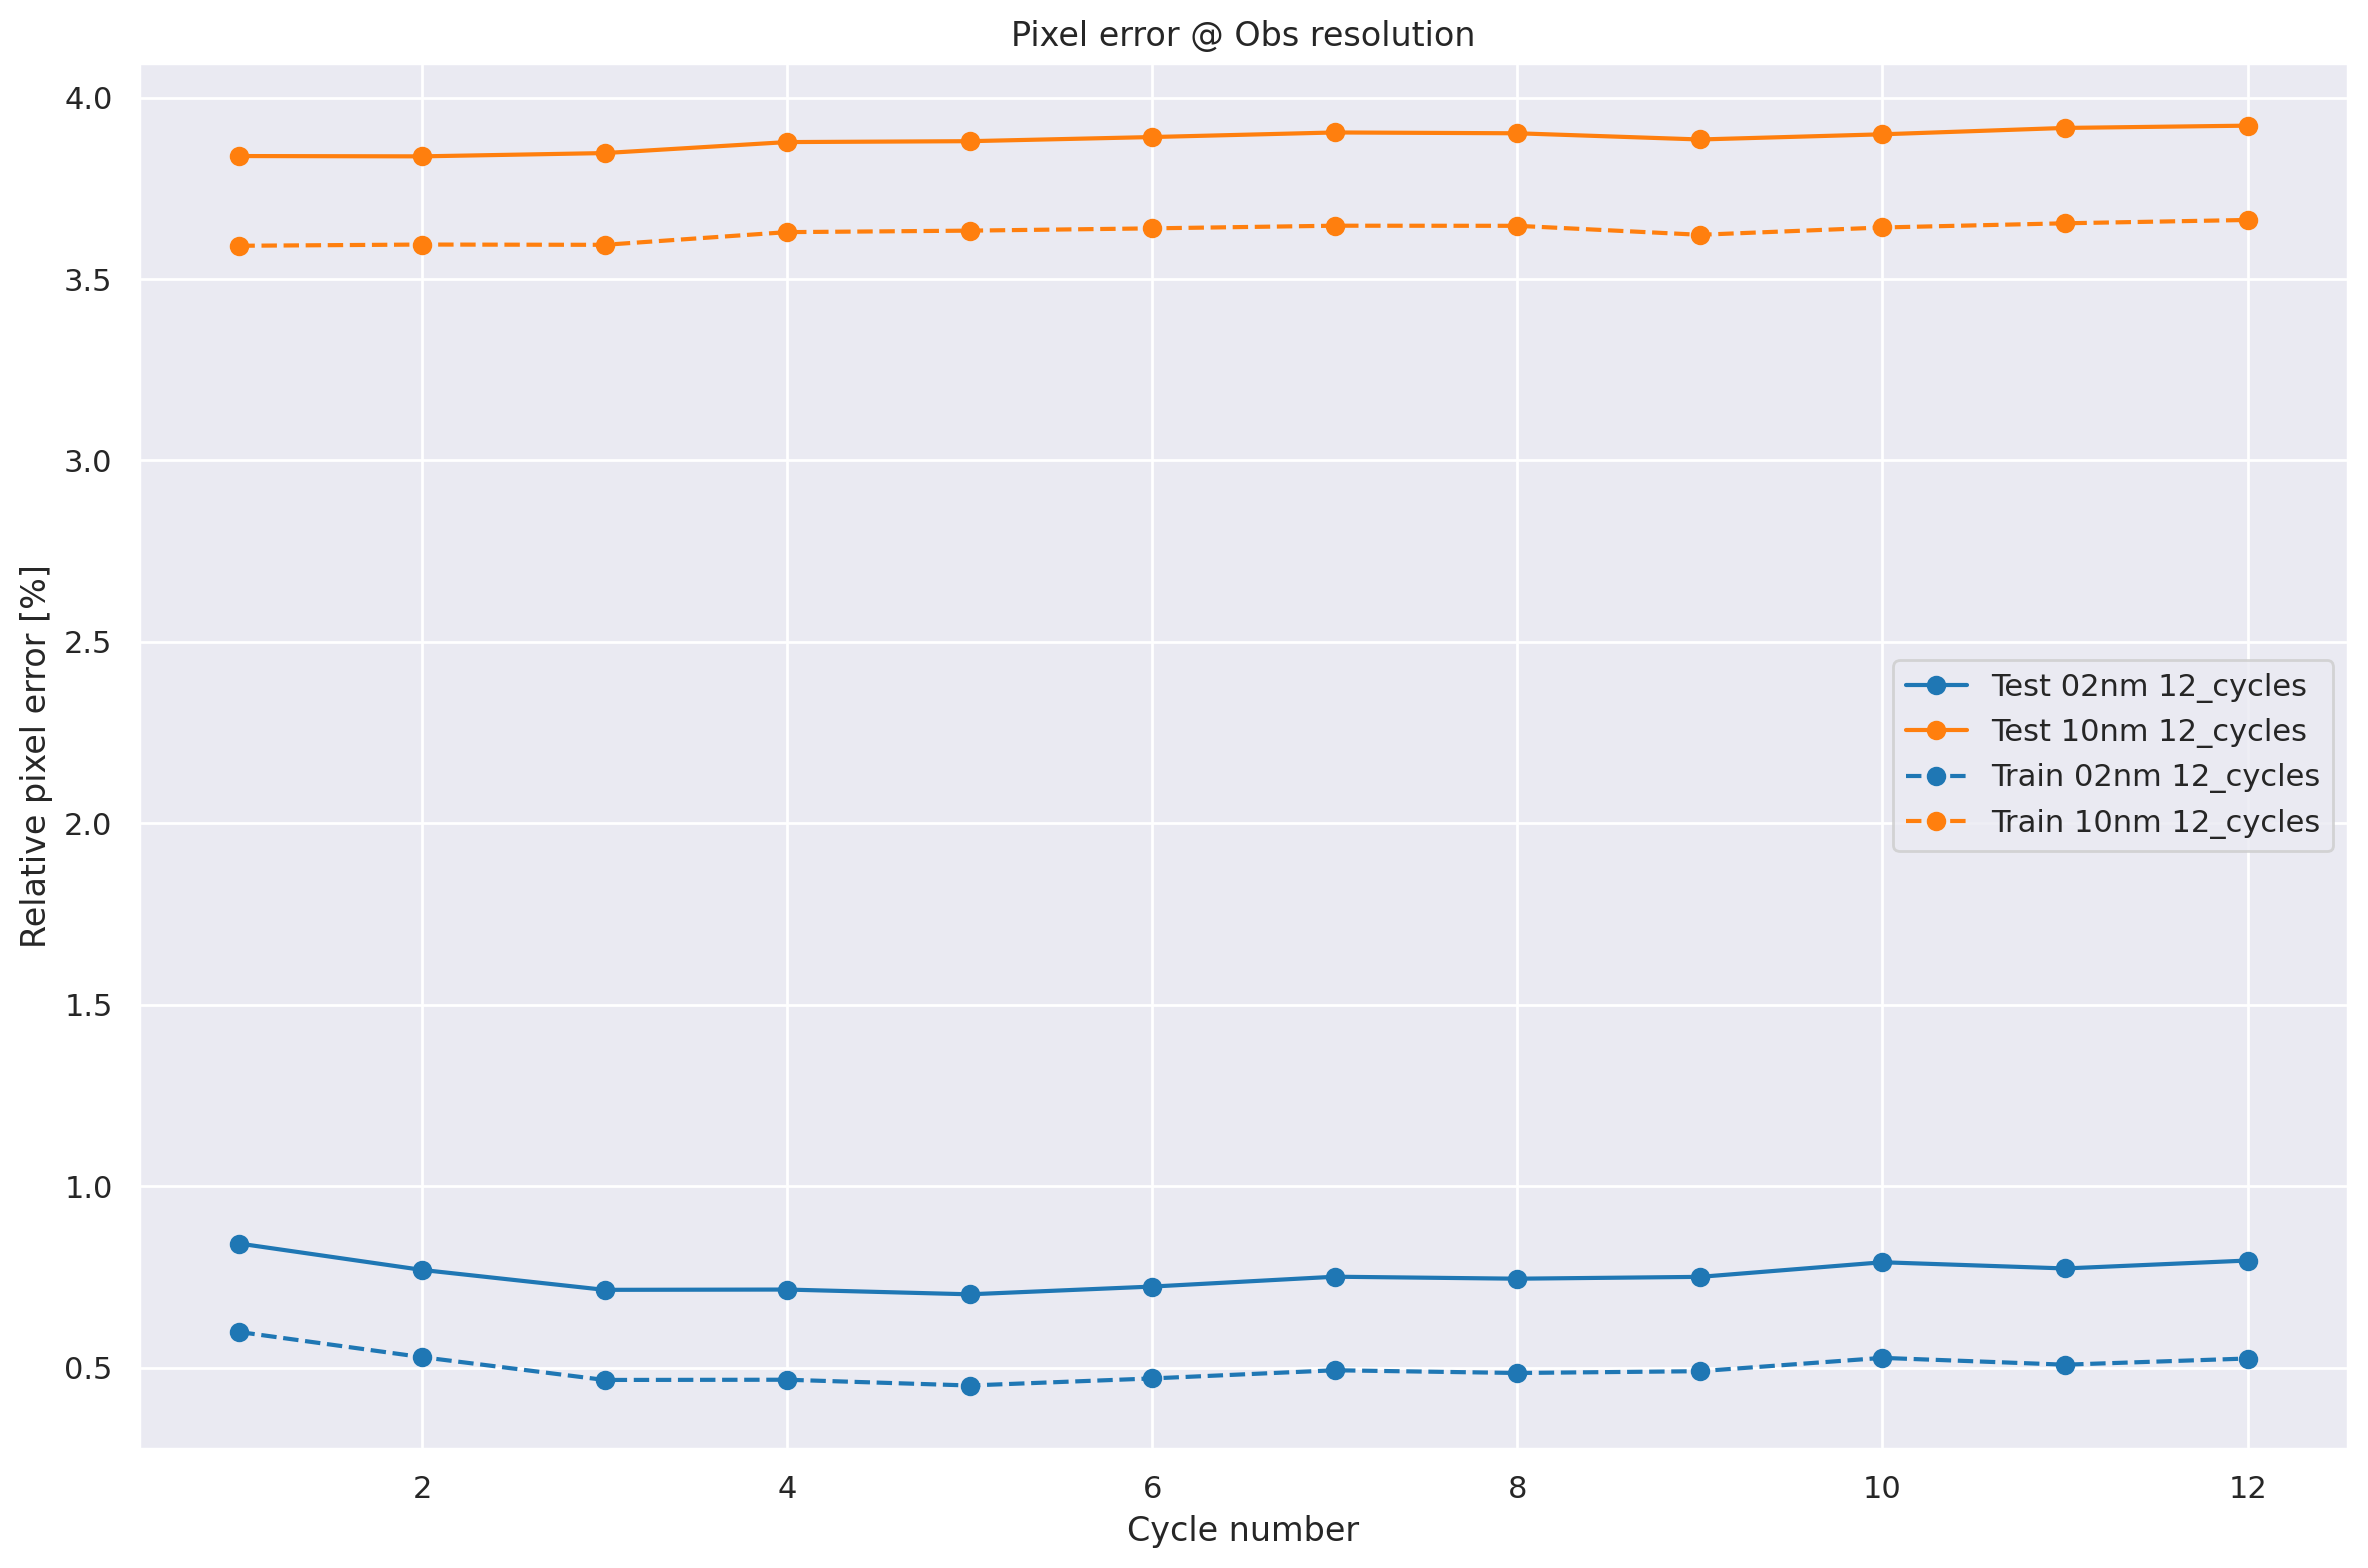

In [15]:
# Pixel
cmap = plt.get_cmap('tab10')

plt.figure()

for it, res in enumerate(test_pix_rel_results):
    plt.plot(np.arange(1,len(res)+1), res, color=cmap(it), label='Test '+labels[it])

for it, res in enumerate(train_pix_rel_results):
    plt.plot(np.arange(1,len(res)+1), res, color=cmap(it), linestyle='dashed', label='Train '+labels[it])

plt.legend()
plt.title('Pixel error @ Obs resolution')
plt.ylabel('Relative pixel error [%]')
plt.xlabel('Cycle number')
plt.show()



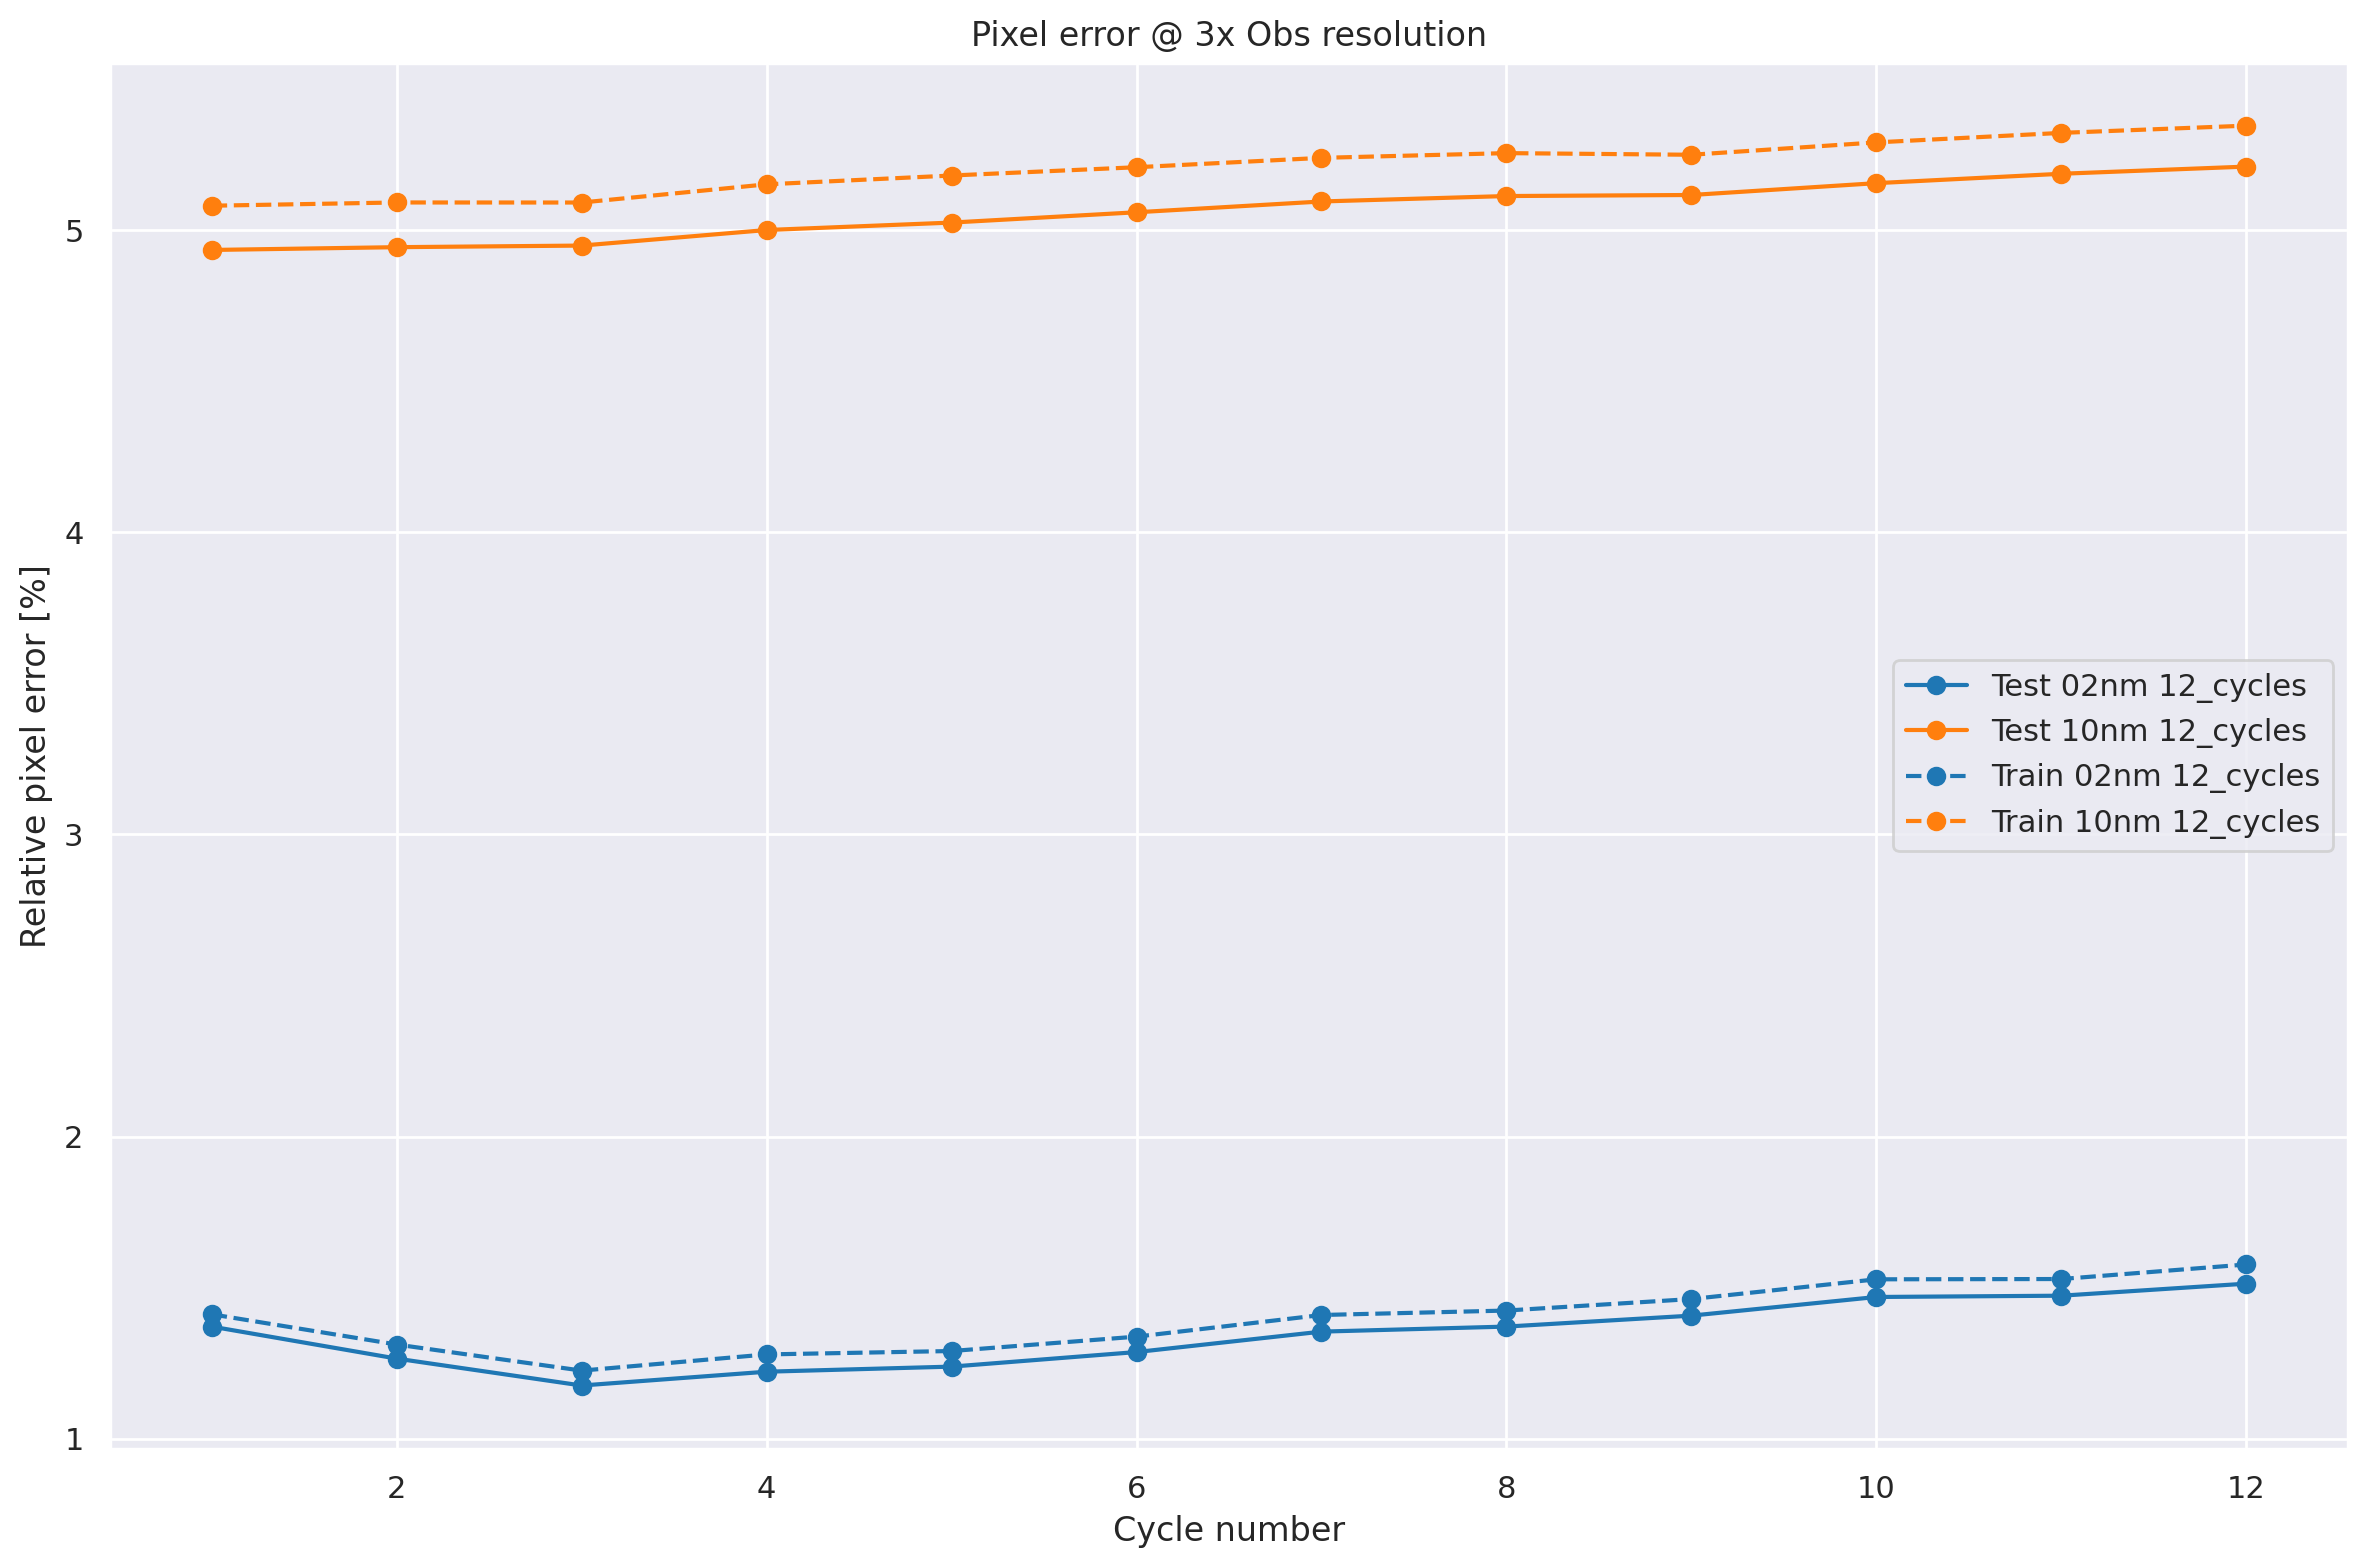

In [16]:
# Pixel
cmap = plt.get_cmap('tab10')

plt.figure()

for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(np.arange(1,len(res)+1), res, color=cmap(it), label='Test '+labels[it])

for it, res in enumerate(train_SR_pix_rel_results):
    plt.plot(np.arange(1,len(res)+1), res, color=cmap(it), linestyle='dashed', label='Train '+labels[it])

plt.legend()
plt.title('Pixel error @ 3x Obs resolution')
plt.ylabel('Relative pixel error [%]')
plt.xlabel('Cycle number')
plt.show()

